**1. Implement 3 different neural networks as listed below**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
tf.random.set_seed(42)
np.random.seed(42)


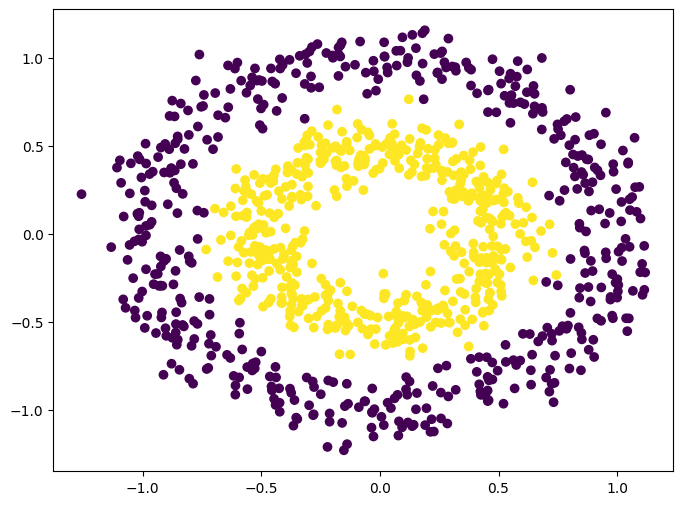

In [2]:
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

**# a. 2 layers. 1st layer : ReLU (5 perceptrons), 2nd Layer : Sigmoid (1 perceptron)**

In [3]:

model_a = Sequential([
 Input(shape=(2,)),
 Dense(5, activation='relu'),
 Dense(1, activation='sigmoid')
])

In [4]:
# Compile the models
model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Train the models
history_a = model_a.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

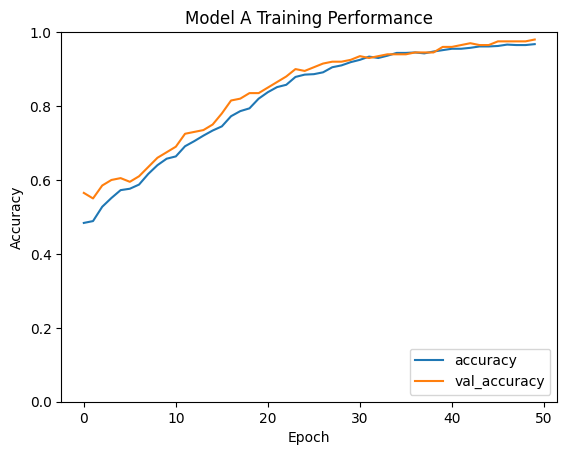

In [6]:
# Plot training history for model a
plt.plot(history_a.history['accuracy'], label='accuracy')
plt.plot(history_a.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model A Training Performance')
plt.legend(loc='lower right')
plt.show()


**# b. In the above layers, both sigmoid**

In [7]:

model_b = Sequential([
 Input(shape=(2,)),
 Dense(5, activation='sigmoid'),
 Dense(1, activation='sigmoid')
])


In [8]:
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history_b = model_b.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


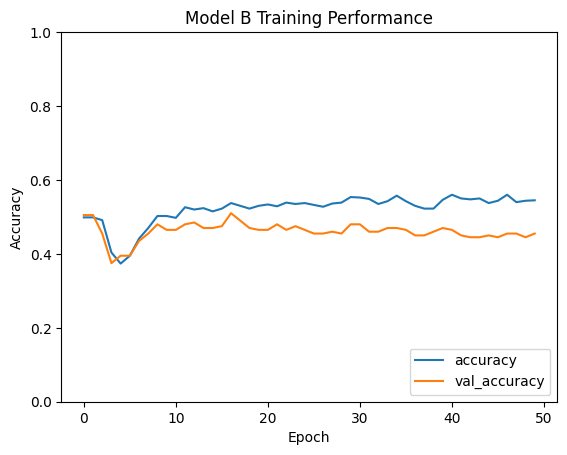

In [10]:
# Plot training history for model b
plt.plot(history_b.history['accuracy'], label='accuracy')
plt.plot(history_b.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model B Training Performance')
plt.legend(loc='lower right')
plt.show()


**# c. 4 layers with first 3 layers: Sigmoid (3) and the last layer: sigmoid (1)**

In [11]:

model_c = Sequential([
 Input(shape=(2,)),
 Dense(3, activation='sigmoid'),
 Dense(3, activation='sigmoid'),
 Dense(3, activation='sigmoid'),
 Dense(1, activation='sigmoid')
])

In [12]:
model_c.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history_c = model_c.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


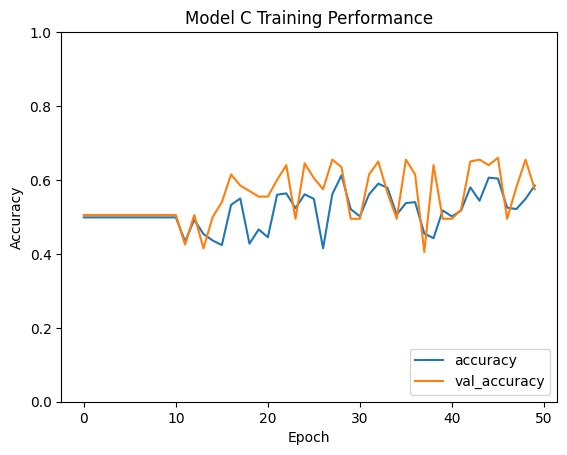

In [14]:
# Plot training history for model c
plt.plot(history_c.history['accuracy'], label='accuracy')
plt.plot(history_c.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model C Training Performance')
plt.legend(loc='lower right')
plt.show()

**2. Execute the sample code with sigmoid function**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
tf.random.set_seed(42)
np.random.seed(42)

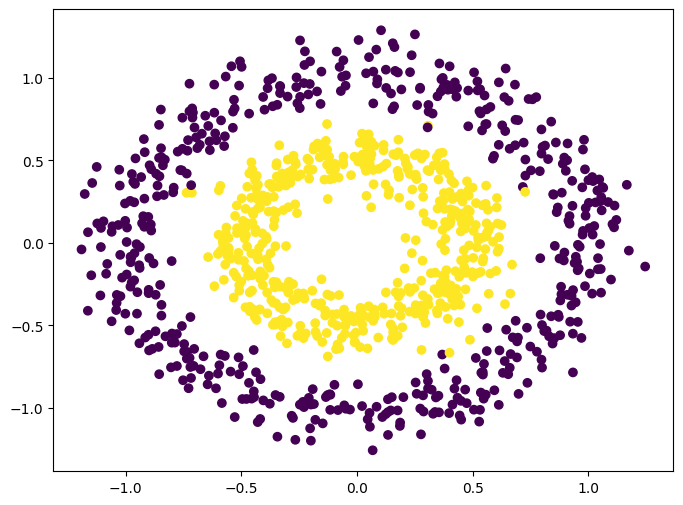

In [24]:
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
# Test performance with 3-layer binary classification network
model = Sequential([
Input(shape=(2,)),
Dense(5, "relu"),
Dense(1, "sigmoid")
])

In [25]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X,y))
# Test performance with 3-layer network with sigmoid activation
model = Sequential([
Input(shape=(2,)),
Dense(5, "sigmoid"),
Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

32/32 [==============================] - 1s 5ms/step - loss: 0.6931 - acc: 0.5000
[0.6931473612785339, 0.5]


In [26]:
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X,y))

32/32 [==============================] - 1s 4ms/step - loss: 0.6785 - acc: 0.8100
[0.6785393953323364, 0.8100000023841858]


In [27]:
# Test performance with 5-layer network with sigmoid activation
model = Sequential([
Input(shape=(2,)),
Dense(5, "sigmoid"),
Dense(5, "sigmoid"),
Dense(5, "sigmoid"),
Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [28]:
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X,y))

32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - acc: 0.5170
[0.6910525560379028, 0.5170000195503235]


In [31]:
# Illustrate weights across epochs
class WeightCapture(Callback):
#"Capture the weights of each layer of the model"
   def __init__(self, model):
     super().__init__()
     self.model = model
     self.weights = []
     self.epochs = []
   def on_epoch_end(self, epoch, logs=None):
     self.epochs.append(epoch) # remember the epoch axis
     weight = {}
     for layer in model.layers:
       if not layer.weights:
         continue
       name = layer.weights[0].name.split("/")[0]
       weight[name] = layer.weights[0].numpy()
     self.weights.append(weight)

def make_mlp(activation, initializer, name):
#"Create a model with specified activation and initalizer"
 model = Sequential([
 Input(shape=(2,), name=name+"0"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name+"1"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name+"2"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name+"3"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name+"4"),
 Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name+"5")
 ])
 return model

In [32]:
def plotweight(capture_cb):
#"Plot the weights' mean and s.d. across epochs"
   fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
   ax[0].set_title("Mean weight")
   for key in capture_cb.weights[0]:
      ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
   ax[0].legend()
   ax[1].set_title("S.D.")
   for key in capture_cb.weights[0]:
      ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
   ax[1].legend()
   plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.5
After training: Accuracy 0.609
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - acc: 0.6090
[0.6911249756813049, 0.609000027179718]


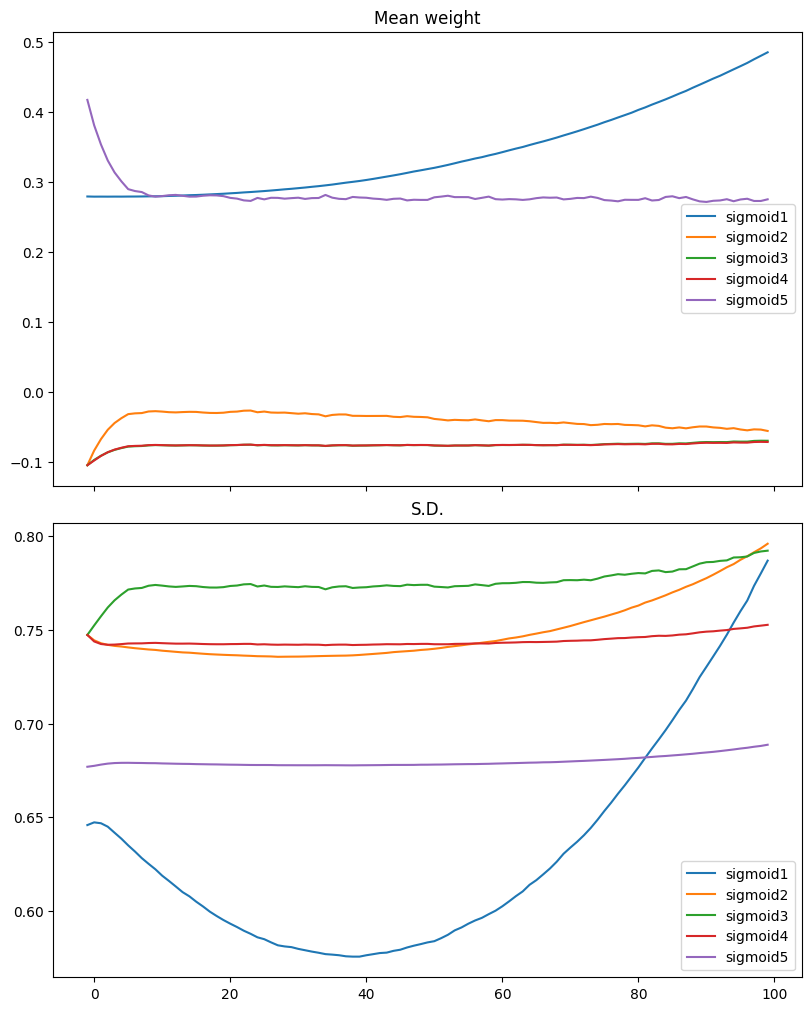

In [33]:
initializer = RandomNormal(mean=0, stddev=1)
batch_size = 32
n_epochs = 100
# Sigmoid activation
model = make_mlp("sigmoid", initializer, "sigmoid")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)

**3. Change the activation function (tanh and relu) and implement the code**


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score


In [35]:
tf.random.set_seed(42)
np.random.seed(42)


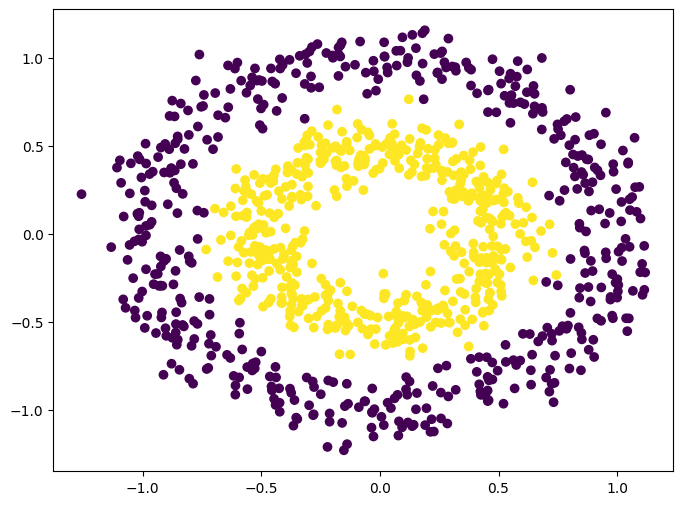

In [36]:
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [37]:
# Test performance with 3-layer binary classification network
model = Sequential([
 Input(shape=(2,)),
 Dense(5, activation="relu"),
 Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))

32/32 [==============================] - 0s 2ms/step - loss: 0.2758 - acc: 0.9530
[0.2758476138114929, 0.953000009059906]


In [38]:
# Test performance with 3-layer network with sigmoid activation
model = Sequential([
 Input(shape=(2,)),
 Dense(5, activation="tanh"),
 Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))

32/32 [==============================] - 0s 2ms/step - loss: 0.4344 - acc: 0.9870
[0.4344443678855896, 0.9869999885559082]


In [39]:
# Test performance with 5-layer network with sigmoid activation
model = Sequential([
 Input(shape=(2,)),
 Dense(5, activation="tanh"),
 Dense(5, activation="tanh"),
 Dense(5, activation="tanh"),
 Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X, y))

32/32 [==============================] - 0s 3ms/step - loss: 0.0392 - acc: 0.9920
[0.0391586497426033, 0.9919999837875366]


In [41]:
# Illustrate weights across epochs
class WeightCapture(Callback):
 "Capture the weights of each layer of the model"
 def __init__(self, model):
   super().__init__()
   self.model = model
   self.weights = []
   self.epochs = []
 def on_epoch_end(self, epoch, logs=None):
   self.epochs.append(epoch) # remember the epoch axis
   weight = {}
   for layer in model.layers:
    if not layer.weights:
      continue
    name = layer.weights[0].name.split("/")[0]
    weight[name] = layer.weights[0].numpy()
   self.weights.append(weight)




In [42]:
def make_mlp(activation, initializer, name):
 "Create a model with specified activation and initializer"
 model = Sequential([
 Input(shape=(2,), name=name + "0"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name + "1"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name + "2"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name + "3"),
 Dense(5, activation=activation, kernel_initializer=initializer, name=name + "4"),
 Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name + "5")
 ])
 return model

In [43]:

 def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
       ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
       ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()


In [44]:
initializer = RandomNormal(mean=0, stddev=1)
batch_size = 32
n_epochs = 100

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.493
After training: Accuracy 0.994
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - acc: 0.9940
[0.01696333847939968, 0.9940000176429749]


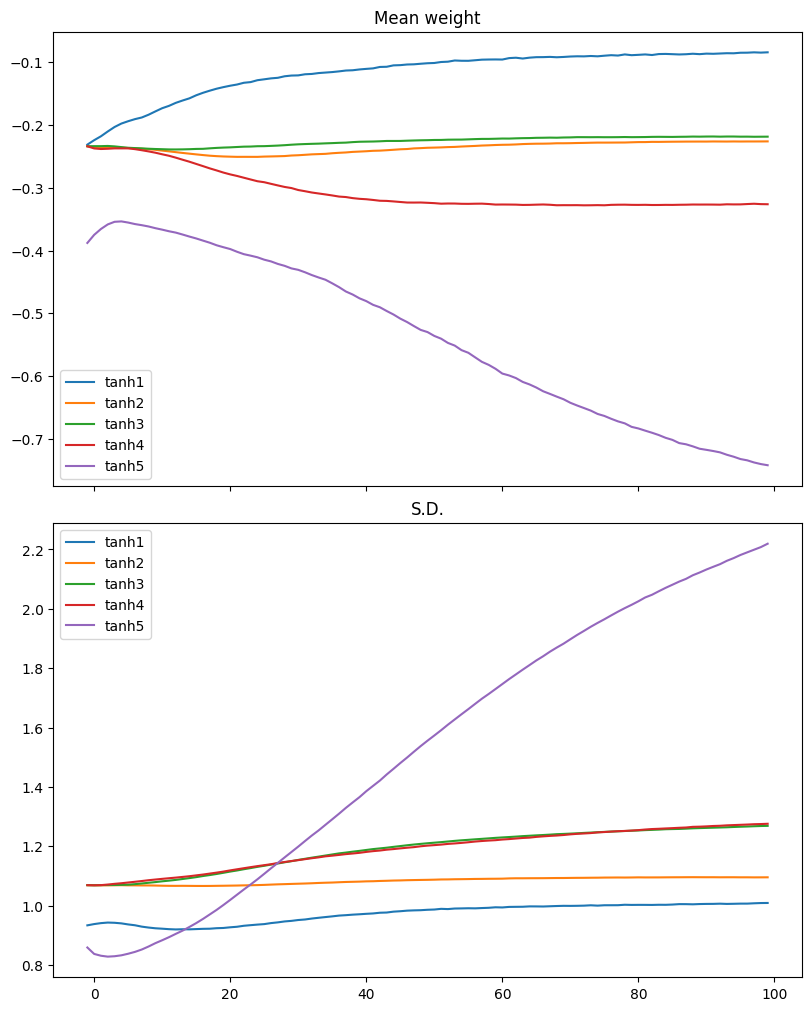

In [45]:
# Sigmoid activation
model = make_mlp("tanh", initializer, "tanh")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X, y))
plotweight(capture_cb)

**4. Implement a code to compare GD, SGD, Minibatch SGD for any input/neural
model of your choice**

In [46]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import time

In [47]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [48]:
# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

In [49]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [50]:
# Define a simple neural network model
def create_model():
 model = Sequential([
 Dense(10, input_shape=(4,), activation='relu', name='dense_1'),
 Dense(3, activation='softmax', name='dense_2')
 ])
 return model

In [51]:
# Define optimization algorithms
gd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
mini_batch_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


In [52]:
# Train models using different optimizers
def train_model(optimizer, X_train, y_train, X_test, y_test):
 model = create_model()
 model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
 start_time = time.time()
 history = model.fit(X_train, y_train, epochs=100, batch_size=len(X_train), validation_data=(X_test,
y_test), verbose=0)
 end_time = time.time()
 training_time = end_time - start_time
 return model, history, training_time


In [53]:
# Train using GD
gd_model, gd_history, gd_training_time = train_model(gd_optimizer, X_train, y_train, X_test, y_test)

In [54]:
# Train using SGD
sgd_model, sgd_history, sgd_training_time = train_model(sgd_optimizer, X_train, y_train, X_test,
y_test)


In [56]:
# Train using Mini-batch SGD
mini_batch_model, mini_batch_history, mini_batch_training_time = train_model(mini_batch_optimizer, X_train, y_train, X_test, y_test)

In [57]:
# Evaluate the models
gd_loss, gd_accuracy = gd_model.evaluate(X_test, y_test, verbose=0)
sgd_loss, sgd_accuracy = sgd_model.evaluate(X_test, y_test, verbose=0)
mini_batch_loss, mini_batch_accuracy = mini_batch_model.evaluate(X_test, y_test, verbose=0)

In [59]:
# Print results
print("Gradient Descent (GD) - Loss:", gd_loss, "Accuracy:", gd_accuracy, "Training Time:", gd_training_time)
print("Stochastic Gradient Descent (SGD) - Loss:", sgd_loss, "Accuracy:", sgd_accuracy, "Training Time:", sgd_training_time)
print("Mini-batch Stochastic Gradient Descent - Loss:", mini_batch_loss, "Accuracy:",
mini_batch_accuracy, "Training Time:", mini_batch_training_time)

Gradient Descent (GD) - Loss: 0.5909973382949829 Accuracy: 0.8333333134651184 Training Time: 5.571341276168823
Stochastic Gradient Descent (SGD) - Loss: 0.859733521938324 Accuracy: 0.5666666626930237 Training Time: 4.034552812576294
Mini-batch Stochastic Gradient Descent - Loss: 0.4378015398979187 Accuracy: 0.9666666388511658 Training Time: 6.08037257194519
